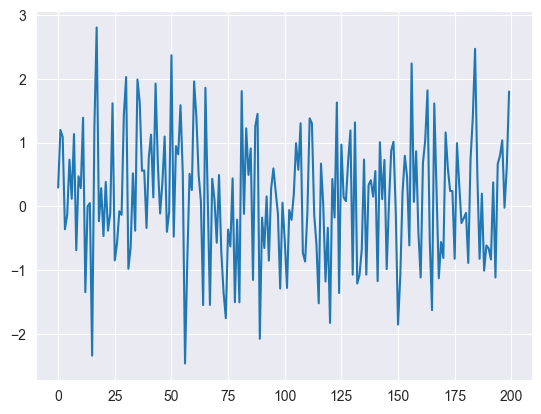

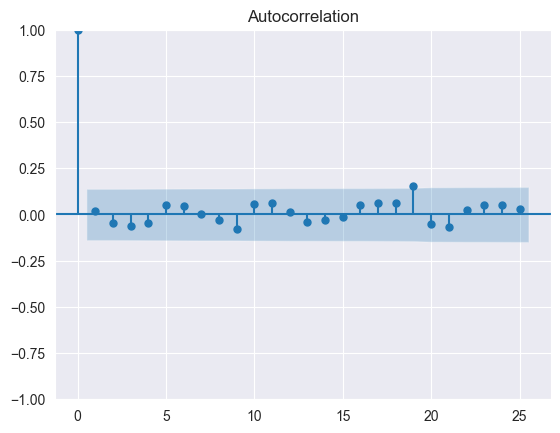

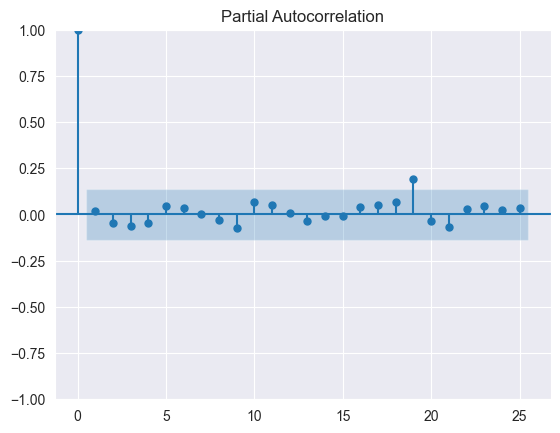

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import warnings
warnings.filterwarnings("ignore")

data = pd.read_csv('Sessions2&3sim.csv', sep = ";", decimal = ",")
series1 = data.iloc[:200,0]
series2 = data.iloc[:200,1]
series3 = data.iloc[:200,2]
series4 = data.iloc[:200,3]
series5 = data.iloc[:200,4]
series6 = data.iloc[:2000,5]

y = series2

num_lags=25 # to discuss

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags,method="ols")
plt.show()


In [2]:
from scipy.stats import kurtosis, skew

# Basic statistics
mean = np.mean(y)
std = np.std(y)
kurtosis = kurtosis(y)
skewness = skew(y)

print("Mean",mean,"Standard deviation",std,"Skewness", skewness, "Kurtosis",kurtosis)


Mean 0.13145500000000002 Standard deviation 0.9970630060206827 Skewness 0.004809229302043662 Kurtosis -0.2748927321878738


In [3]:
#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

ADF test for the original series
Statistic Value: -13.663402558616639
p-value: 1.5064458329965403e-25


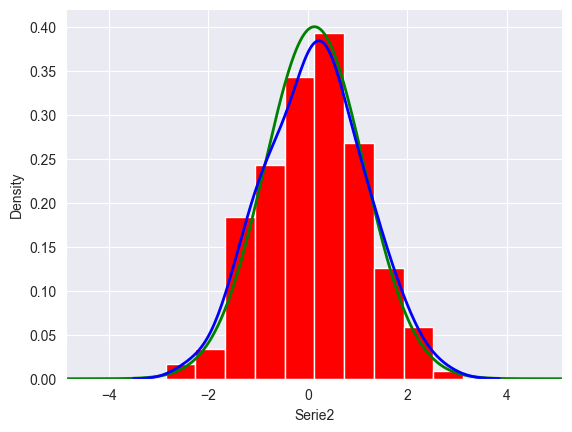

In [4]:
import seaborn as sns
import scipy.stats as st

mu = np.mean(y)
sigma = np.std(y)
x = np.linspace(mu -5*sigma, mu +5*sigma, 1000)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

In [5]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(y)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(y, lags=[20])
box_test


Saphiro ShapiroResult(statistic=0.997439444065094, pvalue=0.9865931868553162)


,lb_stat,lb_pvalue
20,14.414977,0.808848


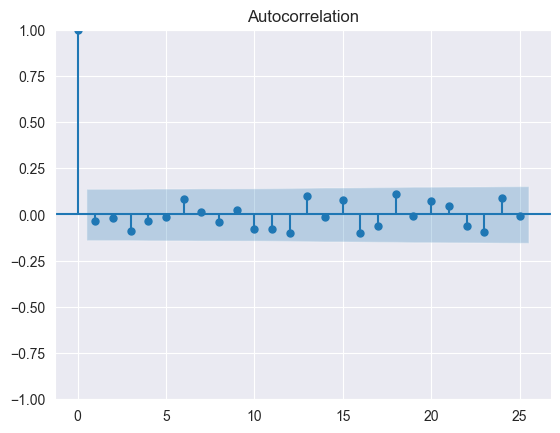

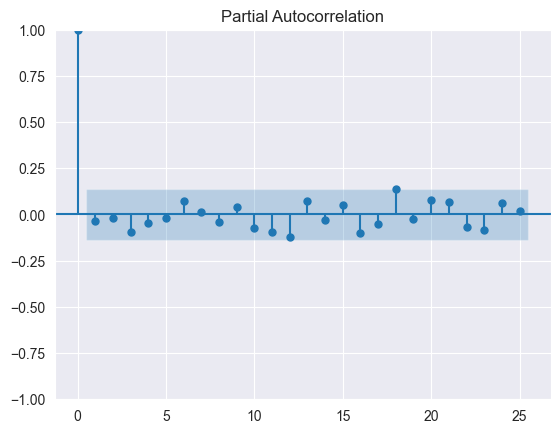

In [6]:
# plt.plot(y**2)
# plt.show()
plot_acf(y**2,lags=num_lags)
plt.show()
plot_pacf(y**2,lags=num_lags,method="ols")
plt.show()

In [7]:
box_test2 = sm.stats.acorr_ljungbox(y**2, lags=[20])
print("Ljung-Box for the squares") 
box_test2


Ljung-Box for the squares


,lb_stat,lb_pvalue
20,19.803786,0.470263


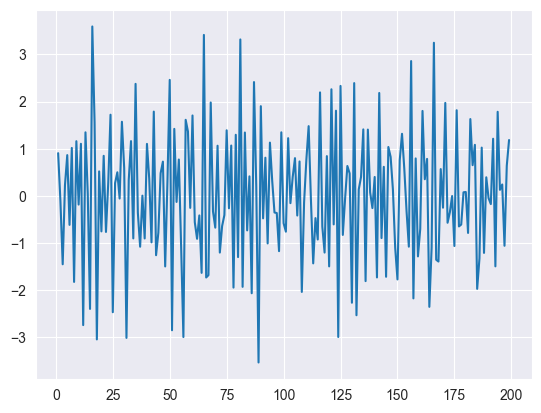

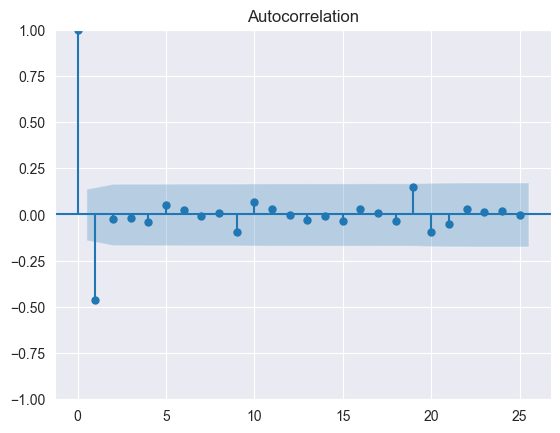

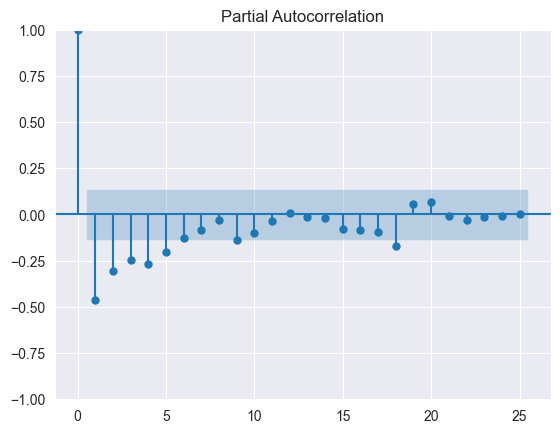

In [8]:
# In case we have to take some differences to the original series
z = y.diff().dropna()
# zz = y.diff(1).diff(1).dropna() # in case we need two differences
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [9]:
box_test_1 = sm.stats.acorr_ljungbox(z, lags=[20])
print("Ljung-Box for z") 
print(box_test_1)
box_test_2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test_2)
#print("Box test z",box_test_1)
#print("Box test z**2",box_test_2)
#print("Ljung-Box: Statistic value", box_test_1[0], "p-value", box_test_1[1]) 
#print("Ljung-Box: Statistic value", box_test_2[0], "p-value", box_test_2[1]) 

Ljung-Box for z
      lb_stat  lb_pvalue
20  55.634797   0.000033
Ljung-Box for z**2
      lb_stat  lb_pvalue
20  17.519397   0.619035


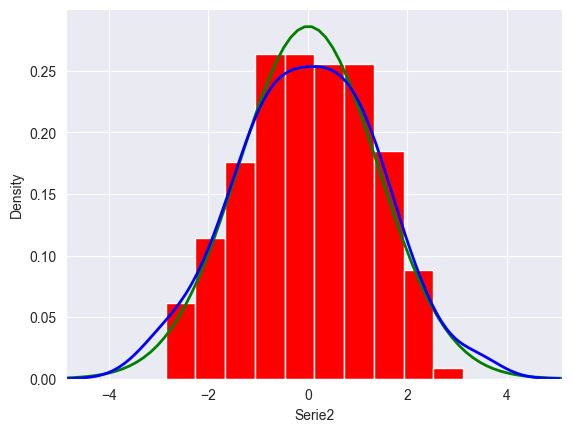

Saphiro ShapiroResult(statistic=0.9960849285125732, pvalue=0.893791139125824)


In [10]:
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

# Analyzing the real time series

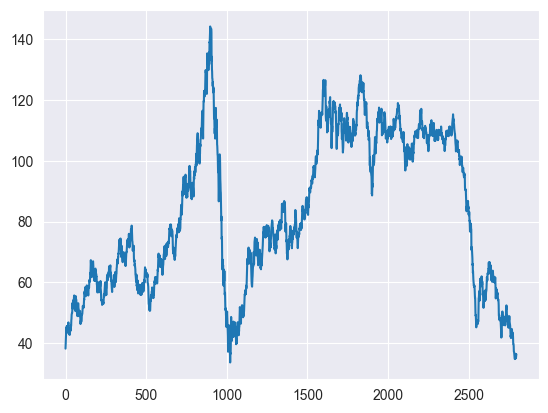

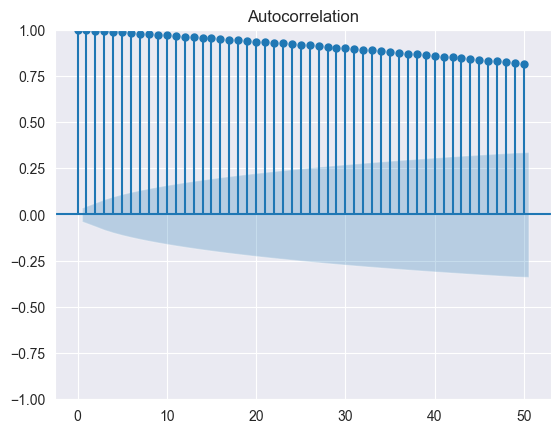

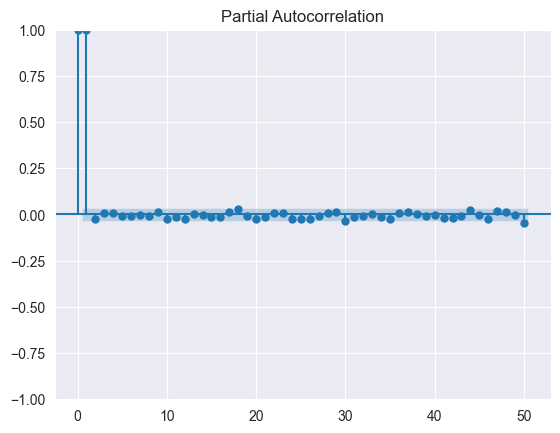

ADF test for the original series
Statistic Value: -1.5924721321980402
p-value: 0.4873739076368578


In [11]:
data = pd.read_csv("Sessions2&3real.csv", sep = ";", decimal = ",")
spot = data.iloc[:,0]
y = spot

num_lags=50

plt.plot(y)
plt.show()
plot_acf(y,lags=num_lags)
plt.show()
plot_pacf(y,lags=num_lags)
plt.show()

#from pmdarima.arima.utils import ndiffs, nsdiffs
import statsmodels as sm

# Ho: the process is not stationary. We need, at least, a unit root
# H1: the process is stationary. We have to check different models (lags)


adf_test = sm.tsa.stattools.adfuller(y,maxlag=10) 
# print("adf_test", adf_test) # first output "The test statistic", second output "p-value"
print("ADF test for the original series")
print("Statistic Value:" , adf_test[0])
print("p-value:" , adf_test[1])
# print(sm.__version__)

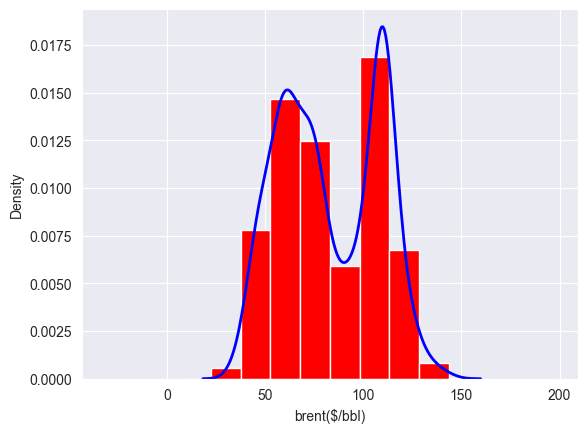

Saphiro ShapiroResult(statistic=0.9431536197662354, pvalue=1.5605605568253859e-31)
mean 82.88516446192348 std 25.300230244404094


In [12]:
saphiro = shapiro(y)
mean = np.mean(y)
std = np.std(y)
mu = np.mean(y)
sigma = np.std(y)

ax = plt.hist(y,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(y, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()
print("Saphiro",saphiro)
print("mean",mean,"std",std)

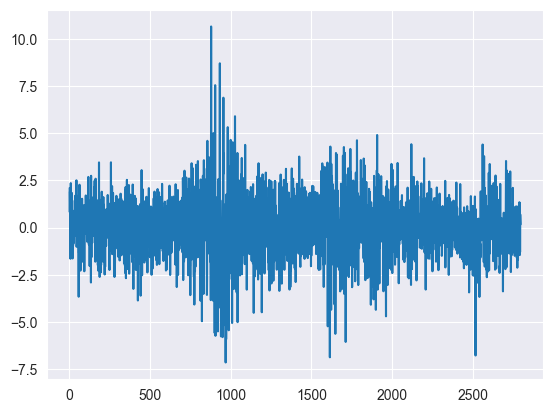

In [13]:
#returns = np.log(spot).diff().dropna() # we take log first and then one differente, diff(log(spot))
#z = returns
z = y.diff().dropna()

plt.plot(z)

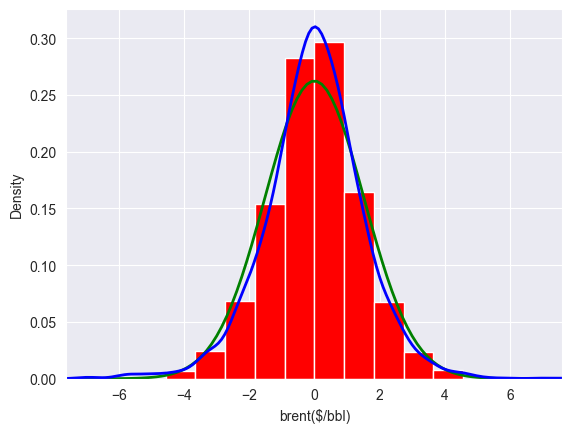

In [14]:
mean = np.mean(z)
std = np.std(z)
mu = np.mean(z)
sigma = np.std(z)
x = np.linspace(mu -5*sigma, mu +5*sigma, 100)
pdf = st.norm.pdf(x, mu, sigma)
ax = plt.plot(x, pdf, lw = 2, color = "g")
ax = plt.hist(z,density=True, range = (mean - 3*std, mean + 3*std), color = "r")
ax = sns.distplot(z, hist = False, kde = True,
                 kde_kws = {'linewidth': 2}, color = "blue")
ax.set_xlim(mean - 5*std, mean + 5*std)

plt.show()

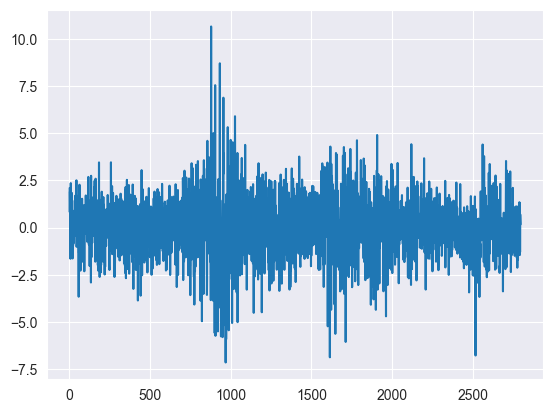

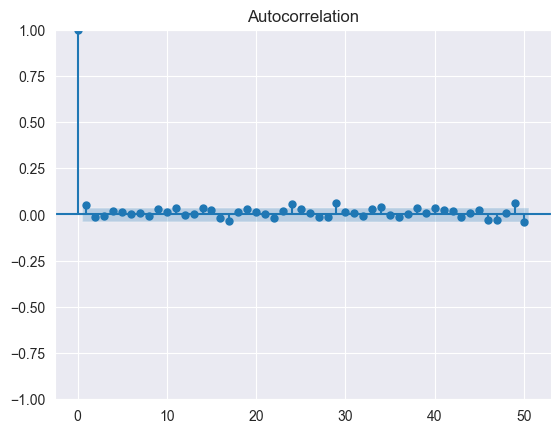

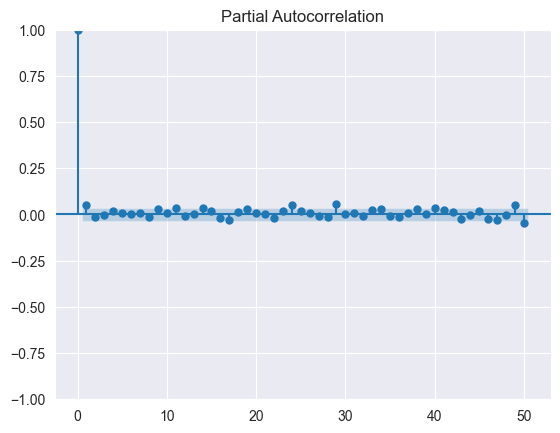

In [15]:
plt.plot(z)
plt.show()
plot_acf(z,lags=num_lags)
plt.show()
plot_pacf(z,lags=num_lags)
plt.show()

In [16]:
from scipy.stats import shapiro
# Normality test
saphiro = shapiro(z)

print("Saphiro",saphiro) # first output "The test statistic", second output "p-value"

import statsmodels.api as sm
box_test = sm.stats.acorr_ljungbox(z, lags=[50])
print("Ljung-Box for z") 
print(box_test)


Saphiro ShapiroResult(statistic=0.9763886332511902, pvalue=3.951343235350646e-21)
Ljung-Box for z
      lb_stat  lb_pvalue
50  98.436748   0.000052


In [17]:
import statsmodels.api as sm
box_test2 = sm.stats.acorr_ljungbox(z**2, lags=[20])
print("Ljung-Box for z**2") 
print(box_test2)

Ljung-Box for z**2
       lb_stat      lb_pvalue
20  622.759486  4.592415e-119


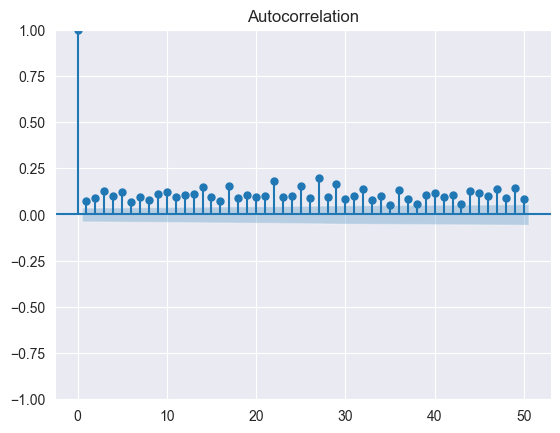

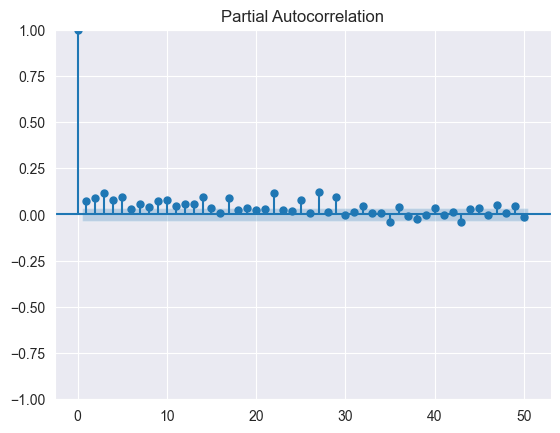

In [18]:
# plt.plot(z**2)
# plt.show()
plot_acf(z**2,lags=num_lags)
plt.show()
plot_pacf(z**2,lags=num_lags)
plt.show()